# Linear Regression + Ridge & Lasso Regression 

In [4]:
# Run the code cell below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import datasets, linear_model, preprocessing, model_selection, metrics
import sklearn.model_selection
from sklearn.model_selection import KFold
%matplotlib inline



# Data Import
Import the data from the file. Process data into dataframes and then into X,Y numpy arrays.

In [6]:

#df = pd.read_csv('/Users/Farhad_Ahmed/Desktop/ML intros/ML Project/HS_Regents_Sat_Scores_2015.csv')
df = pd.read_csv('HS_Regents_Sat_Scores_2015MoreRows.csv')
#print(df)
#data = df.values

# extract all the columns that we need
df1=np.stack((df['English'], df['Global History and Geography'], df['Integrated Algebra'], df['Living Environment'],  df['Average SAT Score (Total)'])).T

#remove any empty rows
df2=(df1[~np.isnan(df1).any(axis=1)])
#print(df2)
#print(df2.shape)

# df3 will be our feature matrix
df3 = df2[:,:4]
#print(df3)

# df4 will be the target vector
df4 = df2[:,4:]
#print(df4)

X = np.array(df3)
Y = np.array(df4)



# Step: 0 K-Fold
Splitting Data Into Training And Test Set Using K-Fold. Do the next steps for each K-Fold Training and Test set

# Step 1: Fit a linear model and print the testset error. 

# Step 2: Ridge Regression
Fit a ridge model using linear_model.ridge(warm_start=True, fit_intercept = True). The alphas variable contains 200 values of regularization parameter. Fit 200 models with these 200 different values of alphas and find test errors for all these 200 models and plot test error v/s alpha. 

# Step 3: Plotting Test Error v/s Alphas
Plot test errors R^2 v/s alphas.

# Step 4: Lasso Regression
Fit a lasso model using linear_model.lasso(.....). The alphas variable contains 200 values of regularization parameter. Fit 200 models with these 200 different values of alphas and find test errors for all these 200 models and plot test        error v/s alpha. 

# Step 5: Plotting Test Error v/s Alphas
Plot test errors R^2 v/s alphas.





The test set r^2 value for split # 1  is:  0.7736103278461007 



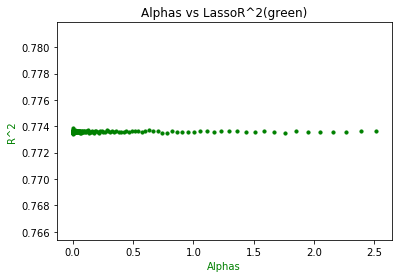

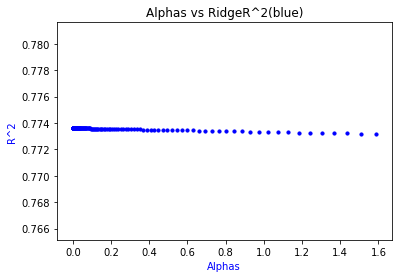

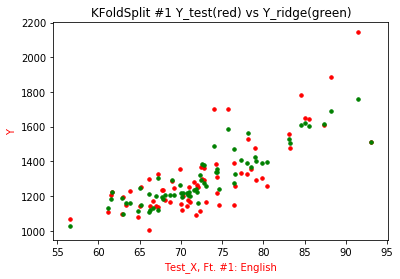

R^2 =  0.7738693867919981


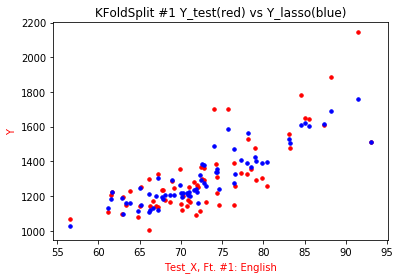

R^2 =  0.7736102997390943


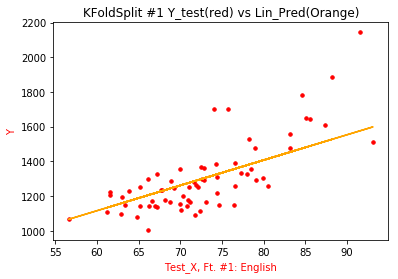

R^2 =  0.5285978858360301


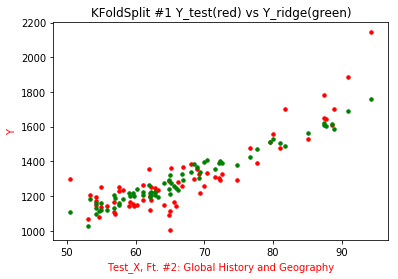

R^2 =  0.7738693867919981


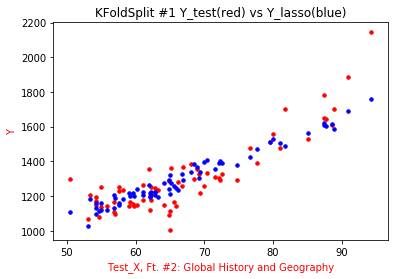

R^2 =  0.7736102997390943


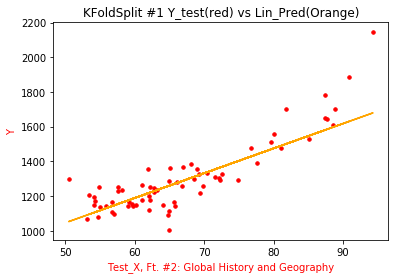

R^2 =  0.7335292787682389


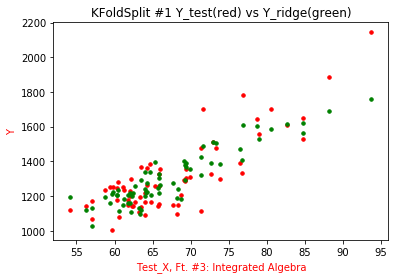

R^2 =  0.7738693867919981


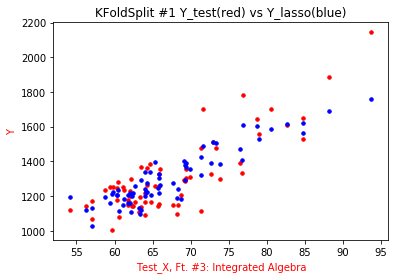

R^2 =  0.7736102997390943


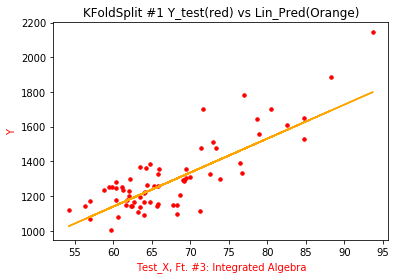

R^2 =  0.6787813570124475


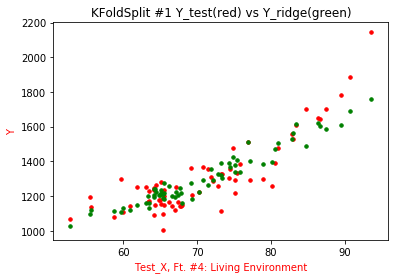

R^2 =  0.7738693867919981


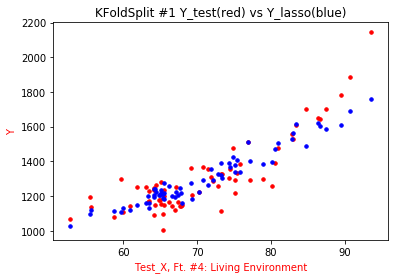

R^2 =  0.7736102997390943


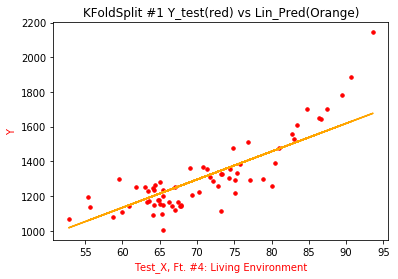

R^2 =  0.7084350085349638





The test set r^2 value for split # 2  is:  0.6020364404392052 



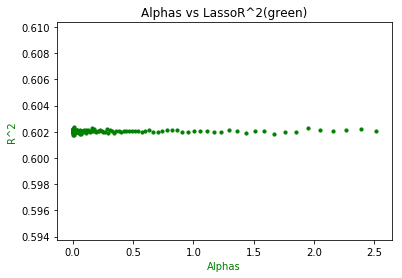

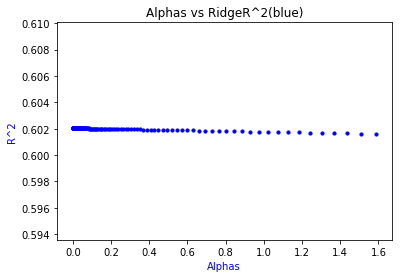

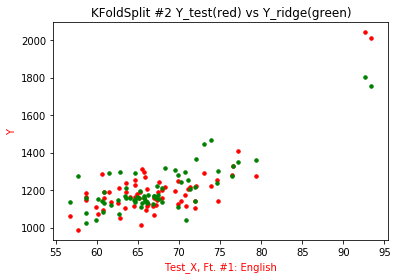

R^2 =  0.602327014403903


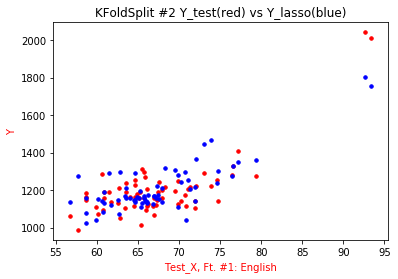

R^2 =  0.6020364092755235


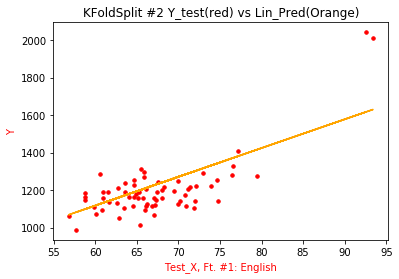

R^2 =  0.5286964278232789


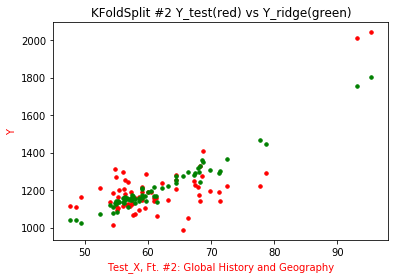

R^2 =  0.602327014403903


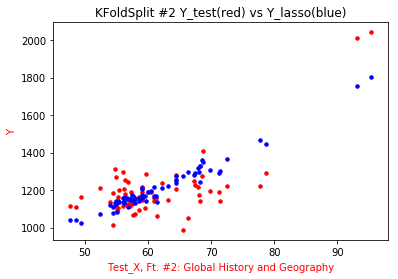

R^2 =  0.6020364092755235


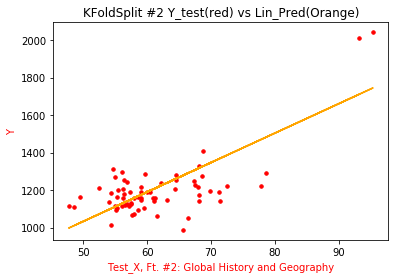

R^2 =  0.47801808211652597


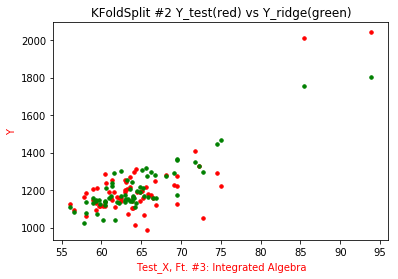

R^2 =  0.602327014403903


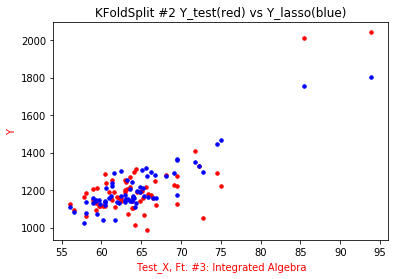

R^2 =  0.6020364092755235


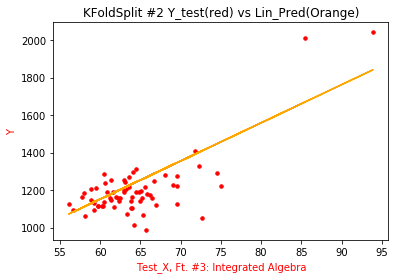

R^2 =  0.5113982458137611


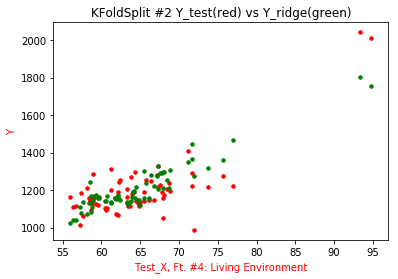

R^2 =  0.602327014403903


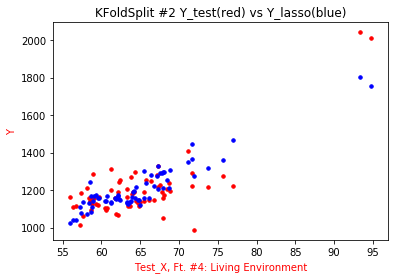

R^2 =  0.6020364092755235


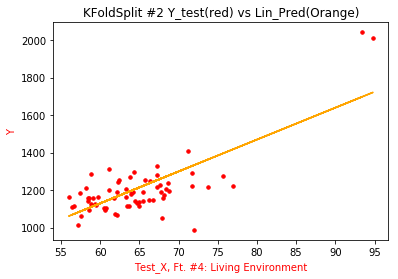

R^2 =  0.5878979219555511





The test set r^2 value for split # 3  is:  0.5573571522699589 



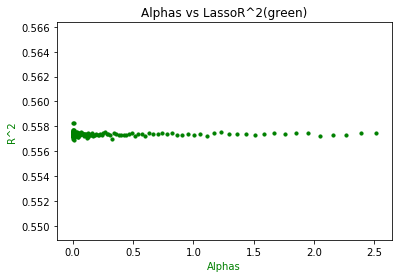

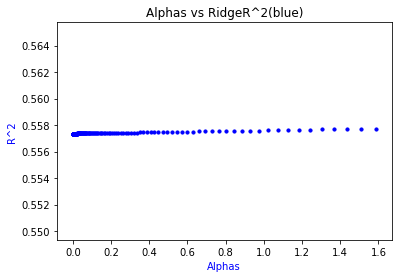

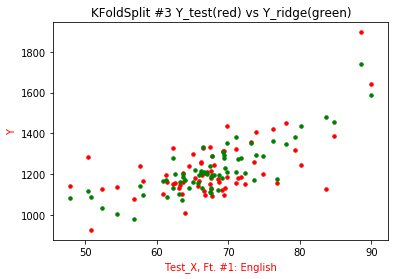

R^2 =  0.5583041892653209


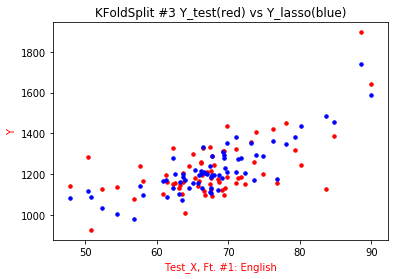

R^2 =  0.5577329931319873


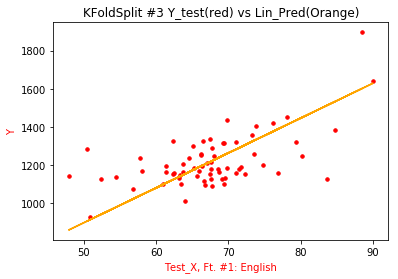

R^2 =  0.1520433867918124


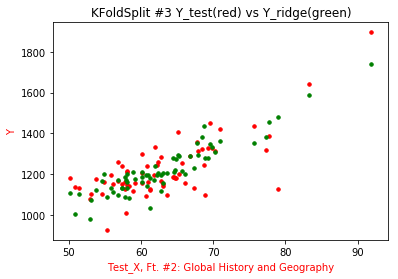

R^2 =  0.5583041892653209


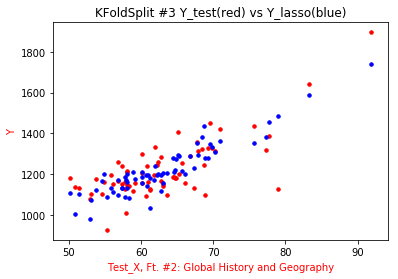

R^2 =  0.5577329931319873


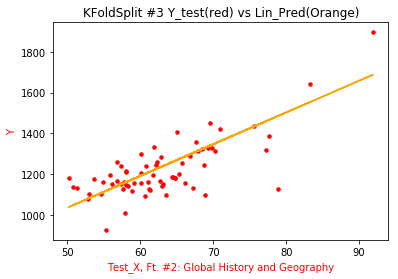

R^2 =  0.5217526152392524


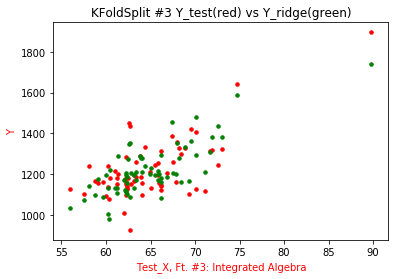

R^2 =  0.5583041892653209


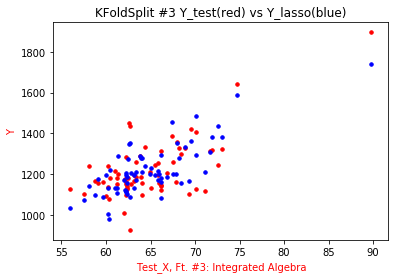

R^2 =  0.5577329931319873


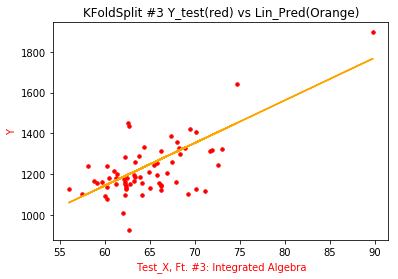

R^2 =  0.4179692403966495


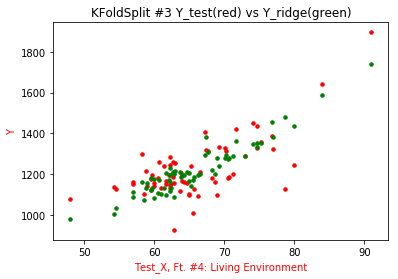

R^2 =  0.5583041892653209


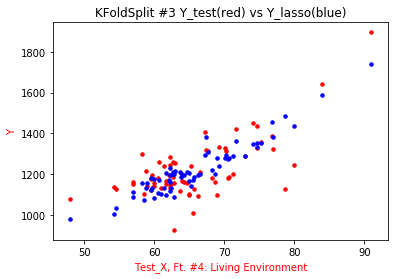

R^2 =  0.5577329931319873


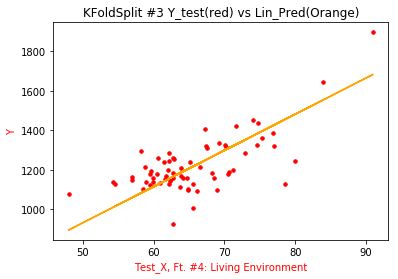

R^2 =  0.40381082712143346





The test set r^2 value for split # 4  is:  0.5944666525724849 



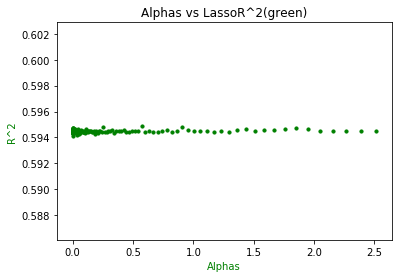

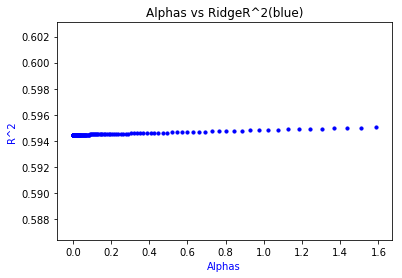

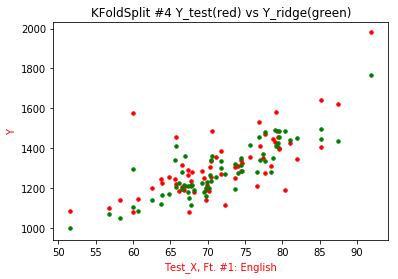

R^2 =  0.594851527730359


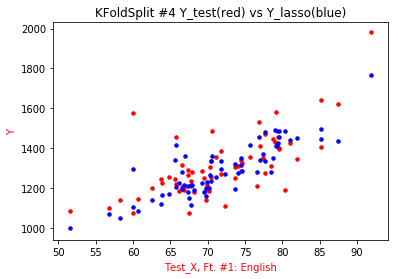

R^2 =  0.5950546895376368


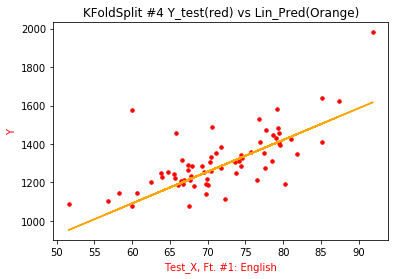

R^2 =  0.4338625994838815


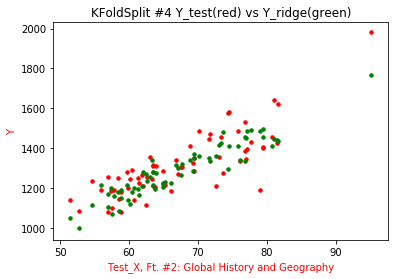

R^2 =  0.594851527730359


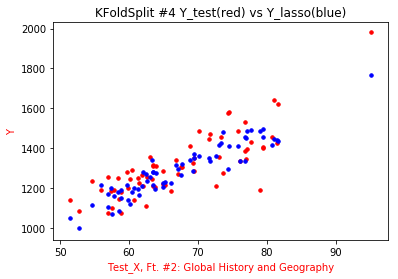

R^2 =  0.5950546895376368


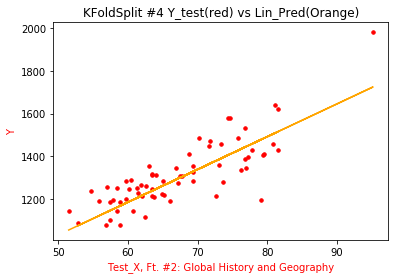

R^2 =  0.6516074826855369


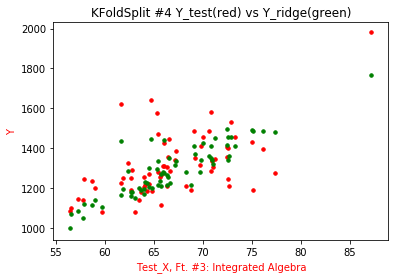

R^2 =  0.594851527730359


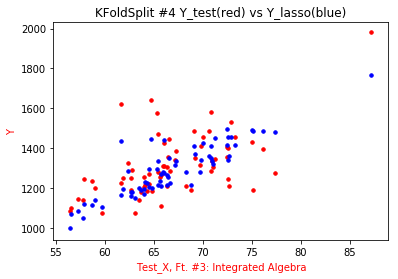

R^2 =  0.5950546895376368


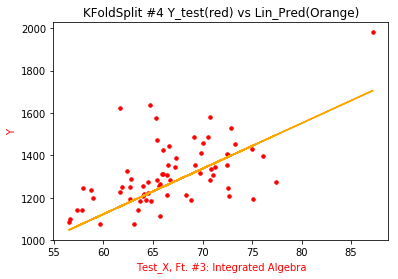

R^2 =  0.21901676685459748


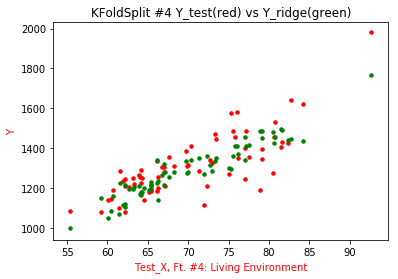

R^2 =  0.594851527730359


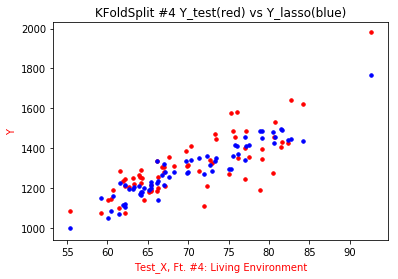

R^2 =  0.5950546895376368


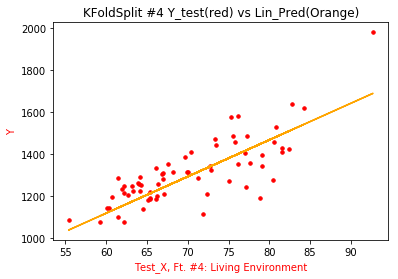

R^2 =  0.6088168450082971




The average R^2 value for multiple linear reg. over K-Folds is:	  0.6318676432819375
The average R^2 value for ridge reg. over K-Folds is:	  0.6323380295478953
The average R^2 value for lasso reg. over K-Folds is:	  0.6321085979210606
The average R^2 value for (ft = Eng) linear reg. over K-Folds is:	  0.4108000749837507
The average R^2 value for (ft = Glbl Hst) linear reg. over K-Folds is:	  0.5962268647023885
The average R^2 value for (ft = Int Alg) linear reg. over K-Folds is:	  0.4567914025193639
The average R^2 value for (ft = Liv Env) linear reg. over K-Folds is:	  0.5772401506550614


In [79]:
kf = KFold(n_splits=4)
splitCounter = 1

featureDict = {0:"English",  
               1:"Global History and Geography", 
               2:"Integrated Algebra",
               3:"Living Environment"}

#multi Linear + Ridge/Lasso
mLinRSq = []
ridgeRSq = []
lassoRSq = []

#linear
linRSq = {0:[], 1:[], 2:[], 3:[]}

for train, test in kf.split(X):
    X_train, X_test, Y_train, Y_test = X[train], X[test], Y[train], Y[test]
    
    '''
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)                   # zero mean and unit variance
    X_test = scaler.transform(X_test)                     # 
    '''
    
    #Multi Linear fit Model
    lin_fit_model = linear_model.LinearRegression()
    lin_fit_model.fit(X_train, Y_train)

    #Calculate the  normalized MSE
    y_test_pred = lin_fit_model.predict(X_test)
    test_set_error = np.sum((y_test_pred - Y_test)**2) / (2*Y_test.shape[0]) 
    r = sklearn.metrics.r2_score(Y_test, y_test_pred)
    mLinRSq.append(r)
    #print("R^2 = ", str(r))
    #print("\nThe test set error for split #", splitCounter, " is: ", test_set_error,"\n")
    print("\nThe test set r^2 value for split #", splitCounter, " is: ", r,"\n")
    
    
    # Ridge Model
    model = linear_model.Ridge(fit_intercept = True, solver = 'sag')
    nalpha = 200
    alphas = np.logspace(-4,0.4,nalpha)
    ridge_error_array = []
    ridge_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)  
        pred = model.predict(X_test)
        #error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        error = sklearn.metrics.r2_score(Y_test, pred)
        ridge_error_array.append(error)
        coefficients = model.coef_
        ridge_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))   
    plt.scatter(alphas,ridge_error_array,color="green",s=10)
    plt.xlabel('Alphas',color="green")
    plt.ylabel('R^2',color="green")
    plt.title("Alphas vs LassoR^2(green)")
    plt.show()
    ridgeRSq.append(max(ridge_pred_dict.keys()))
    
    # Lasso Model
    model = linear_model.Lasso(warm_start=True, fit_intercept = True)
    nalpha = 200
    alphas = np.logspace(-4,0.2,nalpha)
    lasso_error_array = []
    lasso_pred_dict = {}
    for x in range(nalpha):
        model.alpha = alphas[x]
        model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        #error = np.sum((pred-Y_test)**2)/(2*Y_test.shape[0])
        error = sklearn.metrics.r2_score(Y_test, pred)
        lasso_error_array.append(error)
        coefficients = model.coef_
        lasso_pred_dict[error] = (pred,coefficients,np.sum(coefficients != 0))
    plt.scatter(alphas,lasso_error_array,color="blue",s=10)
    plt.xlabel('Alphas',color="blue")
    plt.ylabel('R^2',color="blue")
    plt.title("Alphas vs RidgeR^2(blue)")
    plt.show()
    lassoRSq.append(max(lasso_pred_dict.keys()))
   
    #print("The Coefficients of the model w/ lowest MSE are: \n",coefficients)
    #print("The number of non-zero coefficients is:",str(non_zeros))  
    #print("The Coefficients of the model w/ lowest MSE are: \n",coefficients)
    #print("The number of non-zero coefficients is:",str(non_zeros))  
   
    for feature in range(0,4):    
        plt.scatter(X_test[:,feature],Y_test,color="red",s=12) 
        plt.scatter(X_test[:,feature],ridge_pred_dict[max(ridge_pred_dict.keys())][0],color="green",s=12)
        plt.title('KFoldSplit #' + str(splitCounter) + ' Y_test(red) vs Y_ridge(green)' )
        plt.xlabel('Test_X, '+'Ft. #' + str(feature+1) + ": " + featureDict[feature], color="red")
        plt.ylabel('Y', color="red")
        plt.show()
        print("R^2 = ", str(max(ridge_pred_dict.keys())))
        
        plt.scatter(X_test[:,feature],Y_test,color="red",s=12)
        plt.scatter(X_test[:,feature],lasso_pred_dict[max(lasso_pred_dict.keys())][0],color="blue",s=12)
        plt.title('KFoldSplit #' + str(splitCounter) + ' Y_test(red) vs Y_lasso(blue)' )
        plt.xlabel('Test_X, '+'Ft. #' + str(feature+1) + ": " + featureDict[feature], color="red")
        plt.ylabel('Y', color="red")
        plt.show()
        print("R^2 = ", str(max(lasso_pred_dict.keys())))
        
        plt.scatter(X_test[:,feature],Y_test,color="red",s=12) 
        m,b = np.polyfit(X_train[:,feature],Y_train, 1)
        plt.plot(X_test[:,feature], m*X_test[:,feature] + b, '-',color = "Orange")
        plt.title('KFoldSplit #' + str(splitCounter) + ' Y_test(red) vs Lin_Pred(Orange)' )
        plt.xlabel('Test_X, '+'Ft. #' + str(feature+1) + ": " + featureDict[feature], color="red")
        plt.ylabel('Y', color="red")
        plt.show()
        r = sklearn.metrics.r2_score(Y_test, (X_test[:,feature])*m + b)   # r-squared  
        print("R^2 = ", str(r))
        linRSq[feature].append(r)
        
    splitCounter += 1
    print("\n\n\n")

print("The average R^2 value for multiple linear reg. over K-Folds is:\t ", str((mLinRSq[0]+mLinRSq[1]+mLinRSq[2]+mLinRSq[3])/4))
print("The average R^2 value for ridge reg. over K-Folds is:\t ", str((ridgeRSq[0]+ridgeRSq[1]+ridgeRSq[2]+ridgeRSq[3])/4))
print("The average R^2 value for lasso reg. over K-Folds is:\t ", str((lassoRSq[0]+lassoRSq[1]+lassoRSq[2]+lassoRSq[3])/4))
print("The average R^2 value for (ft = Eng) linear reg. over K-Folds is:\t ", str((linRSq[0][0]+linRSq[0][1]+linRSq[0][2]+linRSq[0][3])/4))
print("The average R^2 value for (ft = Glbl Hst) linear reg. over K-Folds is:\t ", str((linRSq[1][0]+linRSq[1][1]+linRSq[1][2]+linRSq[1][3])/4))
print("The average R^2 value for (ft = Int Alg) linear reg. over K-Folds is:\t ", str((linRSq[2][0]+linRSq[2][1]+linRSq[2][2]+linRSq[2][3])/4))
print("The average R^2 value for (ft = Liv Env) linear reg. over K-Folds is:\t ", str((linRSq[3][0]+linRSq[3][1]+linRSq[3][2]+linRSq[3][3])/4))


